# Import

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sn
pd.options.plotting.backend = 'plotly'

# Data

In [2]:
fifa_df = pd.read_csv('../data/international_matches.csv', parse_dates=['date'])
fifa_df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
fifa_df.loc[~fifa_df['home_team_mean_offense_score'].isnull()].iloc[0]

date                             2004-09-03 00:00:00
home_team                                Netherlands
away_team                              Liechtenstein
home_team_continent                           Europe
away_team_continent                           Europe
home_team_fifa_rank                                6
away_team_fifa_rank                              152
home_team_total_fifa_points                        0
away_team_total_fifa_points                        0
home_team_score                                    3
away_team_score                                    0
tournament                                  Friendly
city                                         Utrecht
country                                  Netherlands
neutral_location                               False
shoot_out                                         No
home_team_result                                 Win
home_team_goalkeeper_score                      93.0
away_team_goalkeeper_score                    

In [40]:
fifa_df['tournament'].mode()

0    Friendly
Name: tournament, dtype: object

In [39]:
fifa_df['tournament'].value_counts(normalize=True)[:10]

Friendly                                0.357761
FIFA World Cup qualification            0.231094
UEFA Euro qualification                 0.072029
African Cup of Nations qualification    0.053259
AFC Asian Cup qualification             0.022616
African Cup of Nations                  0.020484
FIFA World Cup                          0.018059
UEFA Nations League                     0.017349
COSAFA Cup                              0.012918
CECAFA Cup                              0.012876
Name: tournament, dtype: float64

In [38]:
fifa_df['tournament'].value_counts()[:10].plot(kind='bar')

In [3]:
fifa_df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [4]:
fifa_df.describe().T

,count,mean,std,min,25%,50%,75%,max
home_team_fifa_rank,23921.0,77.854688,52.355225,1.0,33.0,71.0,115.0,211.0
away_team_fifa_rank,23921.0,80.797375,53.232902,1.0,36.0,73.0,119.0,211.0
home_team_total_fifa_points,23921.0,323.401488,500.825725,0.0,0.0,0.0,547.0,2164.0
away_team_total_fifa_points,23921.0,315.453576,490.944273,0.0,0.0,0.0,523.0,2164.0
home_team_score,23921.0,1.609214,1.630127,0.0,0.0,1.0,2.0,31.0
away_team_score,23921.0,1.068266,1.263944,0.0,0.0,1.0,2.0,21.0
home_team_goalkeeper_score,8379.0,74.963838,8.212242,47.0,70.0,75.0,81.0,97.0
away_team_goalkeeper_score,8095.0,74.212477,8.225919,47.0,69.0,74.0,80.0,97.0
home_team_mean_defense_score,7787.0,74.903249,6.003114,52.8,71.0,75.2,78.8,91.8
home_team_mean_offense_score,8510.0,75.818743,6.268416,53.3,71.7,75.7,80.0,93.0


<AxesSubplot: >

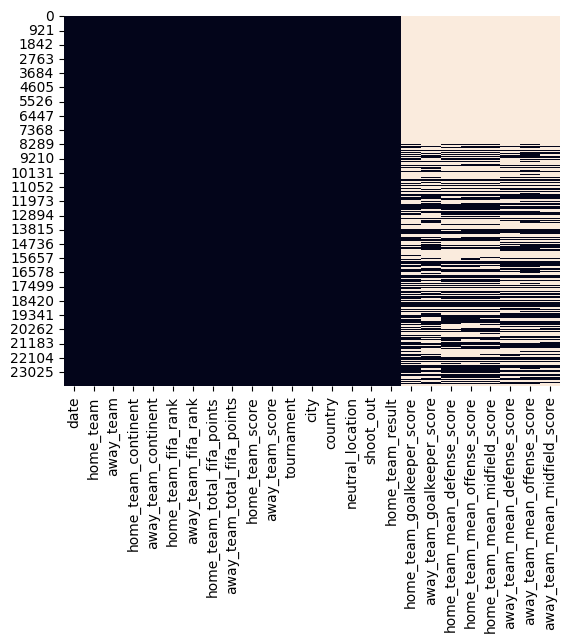

In [5]:
# Visualize null values in the data frame with a heatmap
sn.heatmap(fifa_df.isnull(), cbar=False)


In [6]:
# Lets see how many null values are in each column
fifa_df.isnull().sum().plot(kind='bar', title='Null values per column')

In [29]:
# best current best teams in the world according to their rank
home = fifa_df[['date','home_team','home_team_fifa_rank']].rename(columns={'home_team': 'team', 'home_team_fifa_rank': 'fifa_rank'})
away = fifa_df[['date','away_team','away_team_fifa_rank']].rename(columns={'away_team': 'team', 'away_team_fifa_rank': 'fifa_rank'})

best_current_teams = (pd.concat([home, away])
                      .sort_values(by=['date', 'fifa_rank'], ascending=[False, True])
                      .groupby('team').first().sort_values(by='fifa_rank').reset_index())

best_current_teams[:10].plot(kind='bar', x='team', y='fifa_rank', title='Best current teams in the world', color='team')